In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd                 # Data manipulation library
import numpy as np                  # Numerical computing library

import seaborn as sns               # Data visualization library
import matplotlib.pyplot as plt     # Plotting library

from sklearn.model_selection import train_test_split     # Train-test split
from sklearn import preprocessing                        # Data preprocessing

from sklearn.metrics import classification_report, confusion_matrix   # Model evaluation metrics

from sklearn.model_selection import GridSearchCV         # Grid search for hyperparameter tuning
from sklearn.linear_model import LogisticRegression     # Logistic regression model
from sklearn import svm                                  # Support Vector Machine (SVM) model
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier model


In [ ]:
data_path = "/content/gdrive/MyDrive/Events/ENSIA_challenge_2023/Workshop_data/cardiovascular.csv"

# Exploratory data analysis


In [ ]:
# Read the data from the specified data path
cardioData = pd.read_csv(data_path, index_col=0)

# Print the first few rows of the dataset
print(cardioData.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            5      159             64             36        0  35.626837   
1            2       84             58             23        0  25.595024   
2            6      174             61              0        0  20.892327   
3            1       86             56             19       80  31.176123   
4            0      123             44             33      172  44.320464   

   DiabetesPedigreeFunction  Age   PBS  Outcome  
0                  0.718021   49  4096        1  
1                  0.398072   35  3364        0  
2                  0.609941   35  3721        1  
3                  0.246349   14  3136        0  
4                  2.189998   32  1936        1  


In [ ]:
# Print the number of examples (rows) in the dataset
num_examples = cardioData.shape[0]
print('Number of examples:', num_examples)

# Print the number of features (columns) in the dataset, excluding the target variable
num_features = cardioData.shape[1] - 1
print('Number of features:', num_features)


Number of examples: 2304
Number of features: 9


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.124427       0.138450      -0.080213   
Glucose                      0.124427  1.000000       0.141866       0.052423   
BloodPressure                0.138450  0.141866       1.000000       0.192776   
SkinThickness               -0.080213  0.052423       0.192776       1.000000   
Insulin                     -0.076475  0.311970       0.079509       0.414261   
BMI                          0.029283  0.208064       0.268234       0.384114   
DiabetesPedigreeFunction    -0.027476  0.116837       0.040285       0.180931   
Age                          0.512567  0.247317       0.227667      -0.112863   
PBS                          0.169923  0.178830       0.941156       0.127463   
Outcome                      0.222229  0.458698       0.067828       0.072324   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.076475

<Axes: >

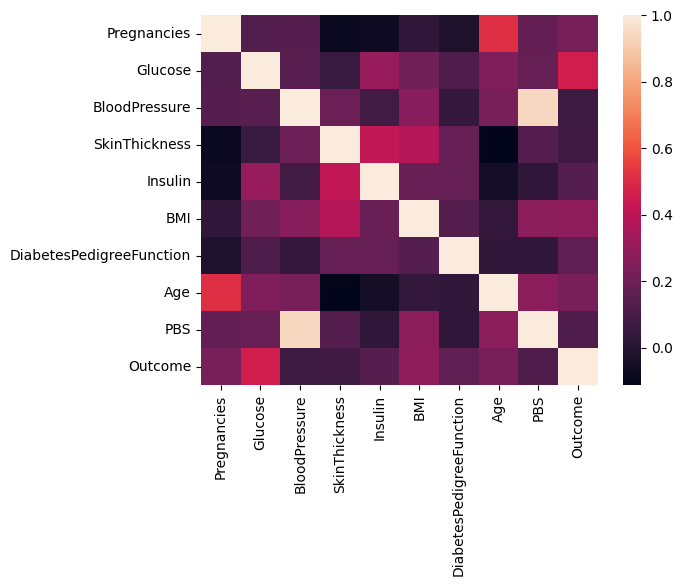

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cardioData.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)


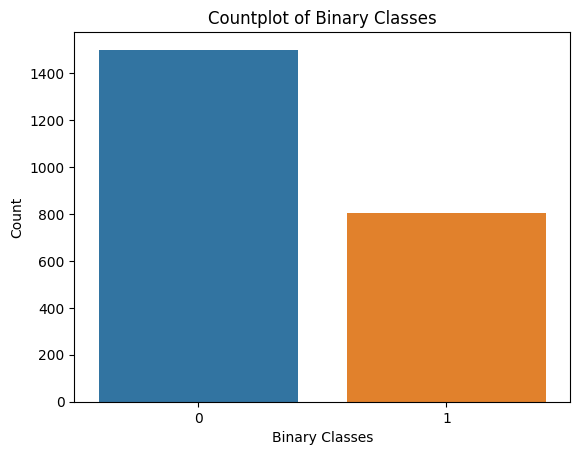

In [ ]:
# Create a countplot to visualize the distribution of binary classes
sns.countplot(data=cardioData, x='Outcome')

# Set the title, x-label, and y-label for the countplot
plt.title('Countplot of Binary Classes')
plt.xlabel('Binary Classes')
plt.ylabel('Count')

# Display the plot
plt.show()


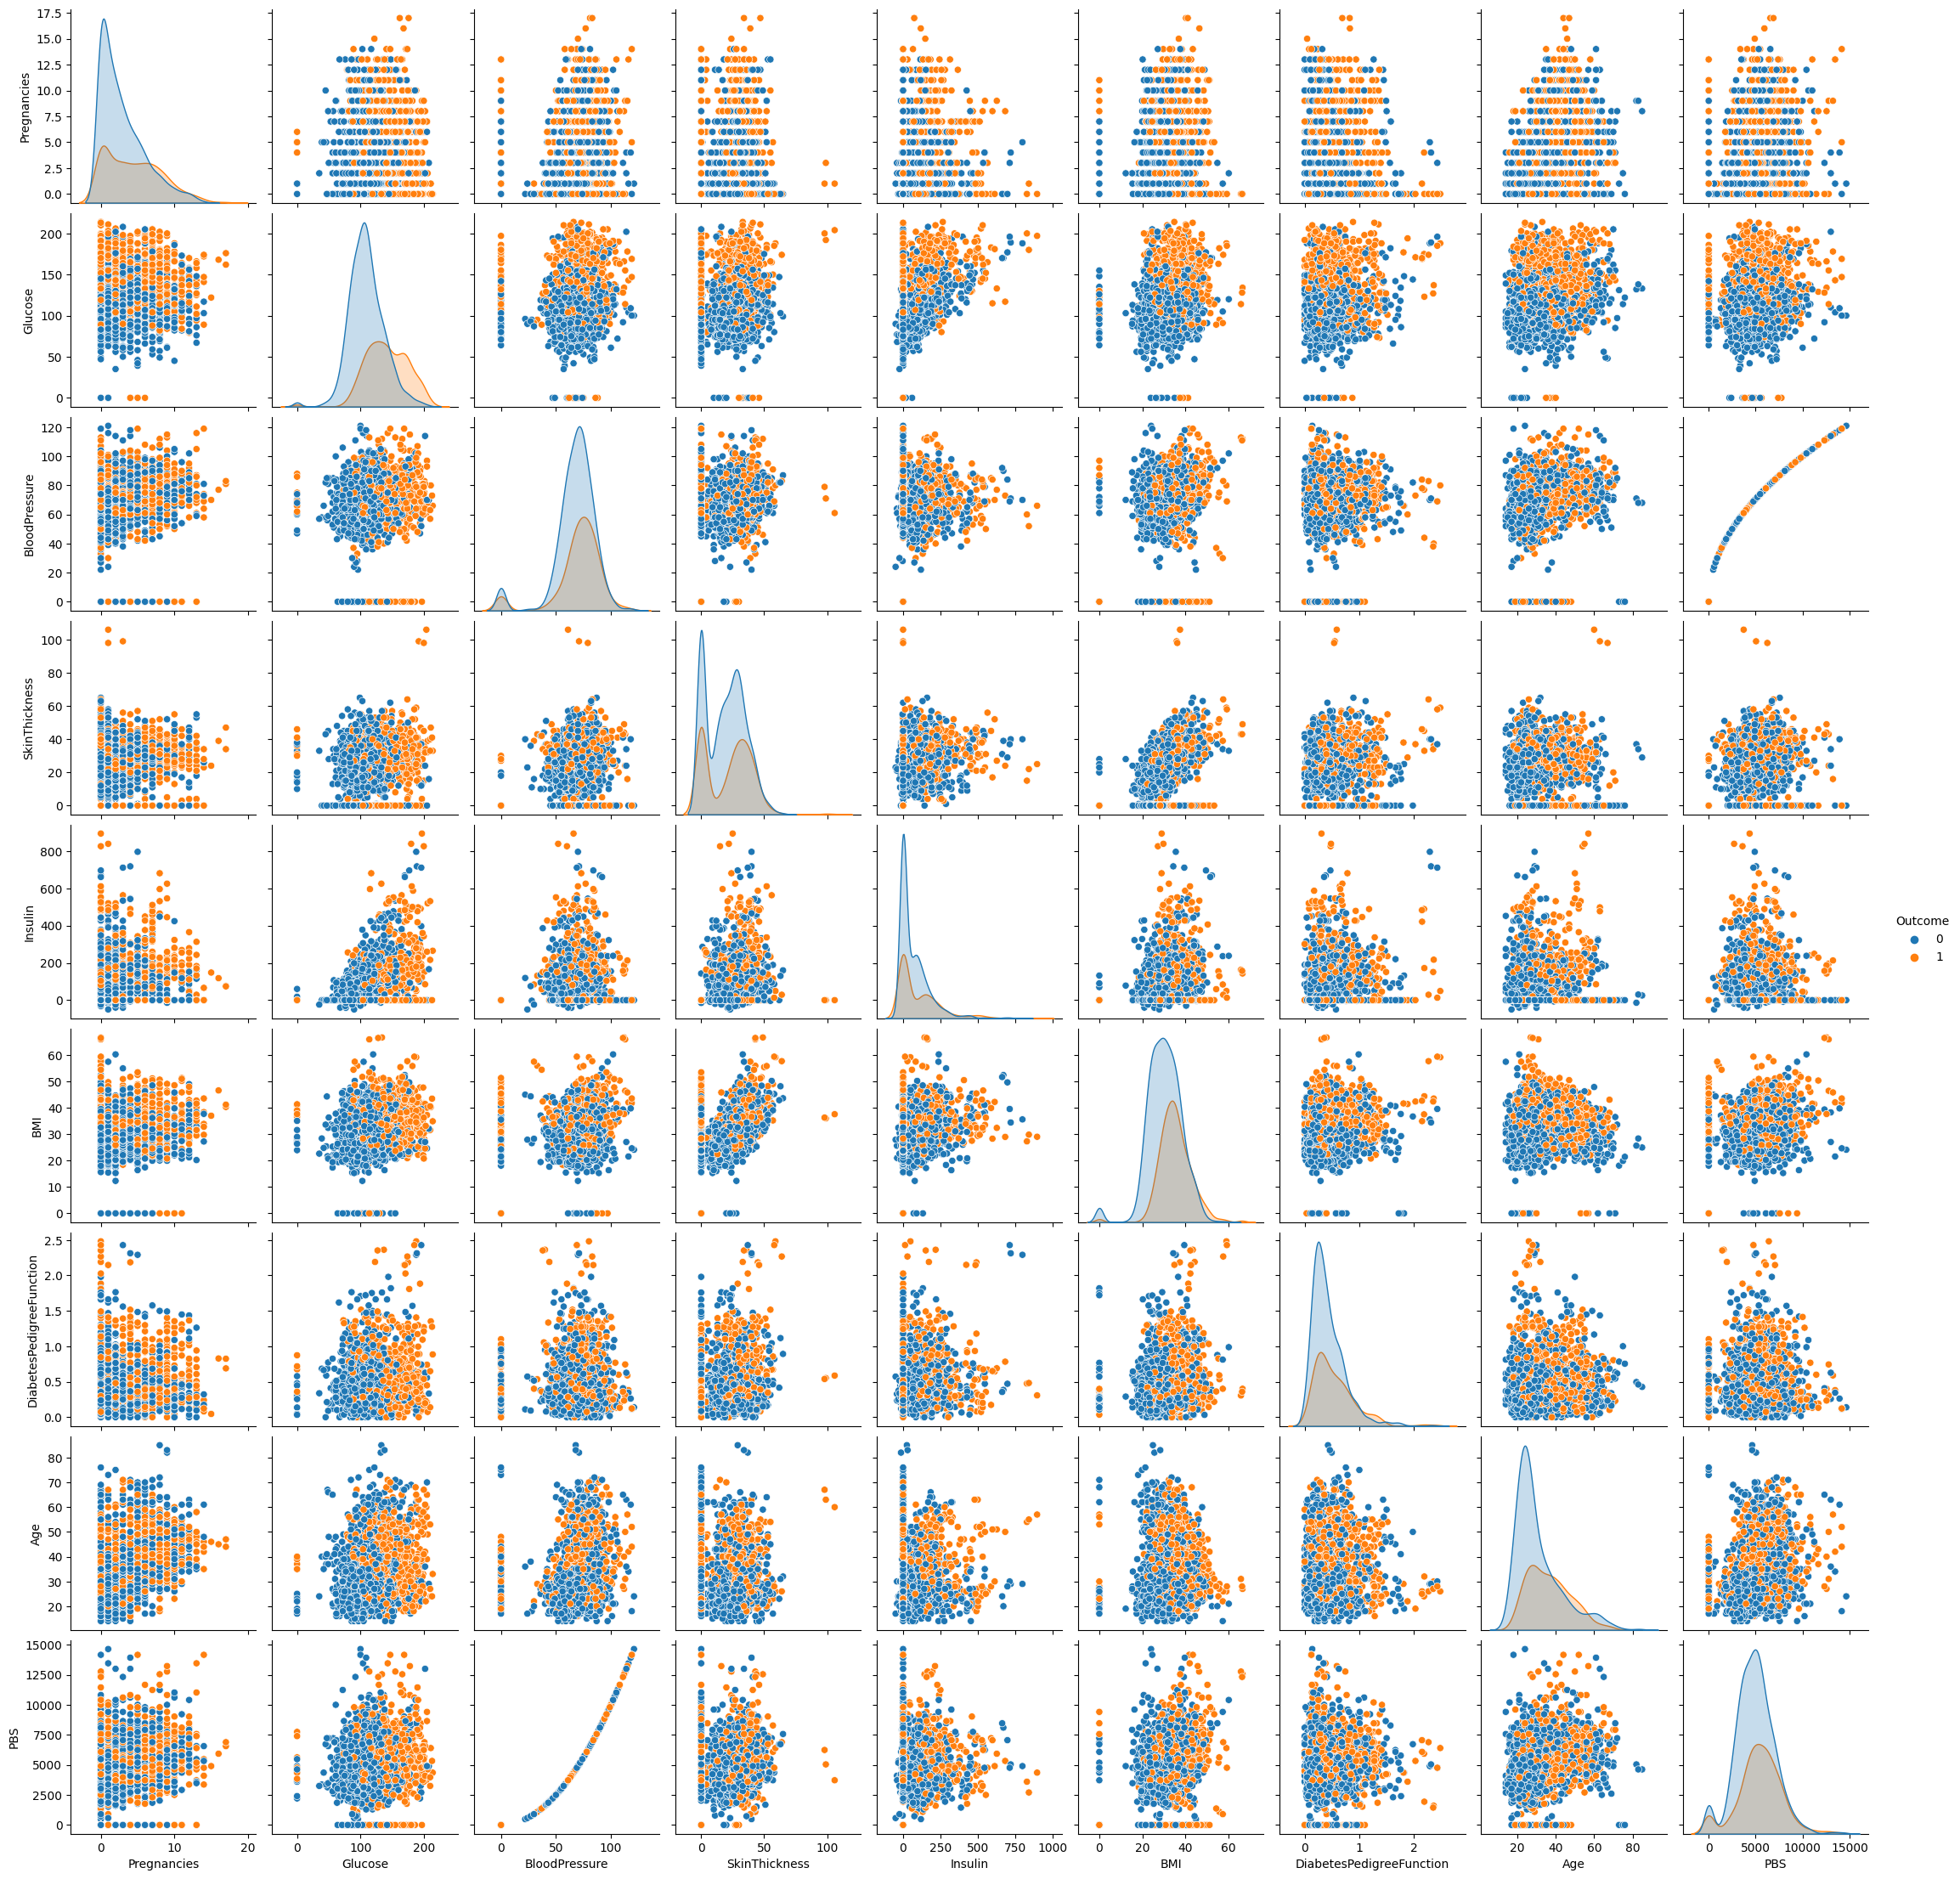

In [ ]:
# Create a pairplot to visualize the relationships between features
sns.pairplot(cardioData, vars=cardioData.columns[:-1], hue="Outcome")

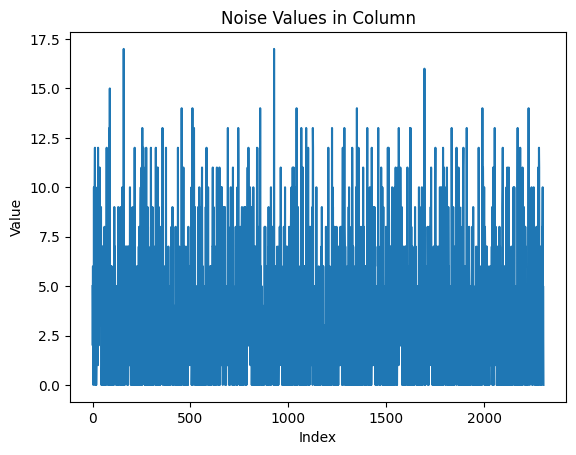

In [ ]:
# Specify the column name to plot
column_name = 'Pregnancies'

# Plot the values in the specified column
plt.plot(cardioData[column_name])

# Set the title, x-label, and y-label for the plot
plt.title('Noise Values in Column')
plt.xlabel('Index')
plt.ylabel('Value')

# Display the plot
plt.show()


# Modeling (Logisitic regression , SVM, Random forrest)

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

def confusion_matrix_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Create a seaborn heatmap for the confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

    # Add labels, title, and axis ticks to the plot
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")

    # Display the plot
    plt.show()

def grid_search_hyperparameters(model, param_grid):
    # Initialize GridSearchCV with the model and parameter grid
    grid_search = GridSearchCV(model, param_grid, cv=5)

    # Fit the model with grid search on the training data
    best_model = grid_search.fit(X_train, y_train).best_estimator_
    best_params = grid_search.best_params_
    print("Best parameters:", best_params)

    return best_model


# Split Data

In [ ]:
X = cardioData.drop('Outcome', axis=1)  # Remove the column containing the target variable
y = cardioData['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1543, 9) (761, 9) (1543,) (761,)


# Data Standardization.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

## Train the default model

In [ ]:
# Initialize the logistic regression model
log_reg_model =  LogisticRegression(solver='liblinear')

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Classification Report:
              precision    recall  f1-score   support

           0     0.7784    0.9127    0.8402       481
           1     0.7868    0.5536    0.6499       280

    accuracy                         0.7806       761
   macro avg     0.7826    0.7331    0.7450       761
weighted avg     0.7815    0.7806    0.7702       761



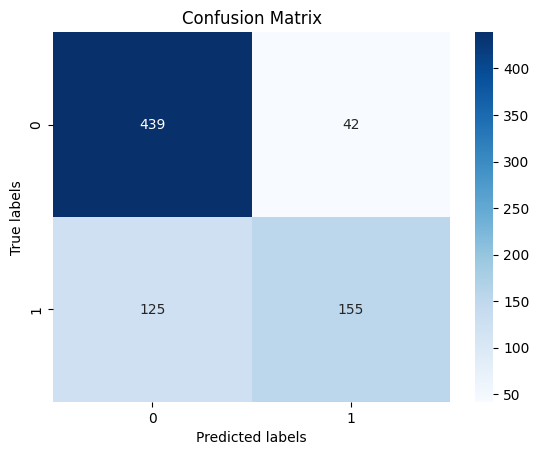

In [ ]:
evaluate_model(log_reg_model,X_test,y_test)
confusion_matrix_model(log_reg_model,X_test,y_test)

##  Grid Search for Hyperparameter Tuning in Logistic Regression

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression(solver='liblinear')
# Define the hyperparameters and their potential values for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
best_log_reg_model= grid_search_hyperparameters(logreg,param_grid)


Best paramaters :  {'C': 10, 'penalty': 'l1'}


Classification report : 
              precision    recall  f1-score   support

           0     0.7798    0.9127    0.8410       481
           1     0.7879    0.5571    0.6527       280

    accuracy                         0.7819       761
   macro avg     0.7838    0.7349    0.7469       761
weighted avg     0.7827    0.7819    0.7717       761



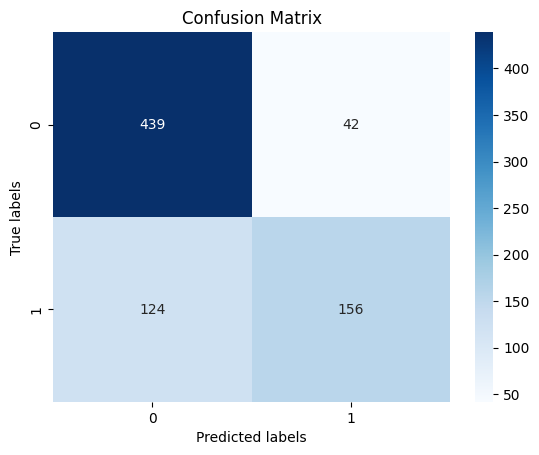

In [ ]:
evaluat_model(best_log_reg_model,X_test,y_test)
confusion_matrix_model(best_log_reg_model,X_test,y_test)

## Train the deafault Support Vector Machine (SVM) model

In [ ]:
# Initialize the SVM model
svm_model = svm.SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC()

Classification report : 
              precision    recall  f1-score   support

           0     0.7762    0.9376    0.8493       481
           1     0.8333    0.5357    0.6522       280

    accuracy                         0.7898       761
   macro avg     0.8048    0.7367    0.7508       761
weighted avg     0.7973    0.7898    0.7768       761



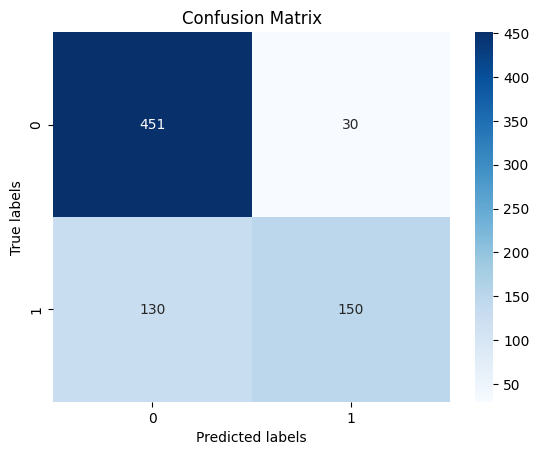

In [ ]:
evaluat_model(svm_model,X_test,y_test)
confusion_matrix_model(svm_model,X_test,y_test)

## Grid Search for Hyperparameter Tuning in SVM

In [ ]:
# Initialize the SVM model
svm_svc = svm.SVC()
# Define the hyperparameters and their potential values for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

best_svm_model = grid_search_hyperparameters(svm_svc,param_grid)


Best paramaters :  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Classification report : 
              precision    recall  f1-score   support

           0     0.8696    0.9148    0.8916       481
           1     0.8392    0.7643    0.8000       280

    accuracy                         0.8594       761
   macro avg     0.8544    0.8395    0.8458       761
weighted avg     0.8584    0.8594    0.8579       761



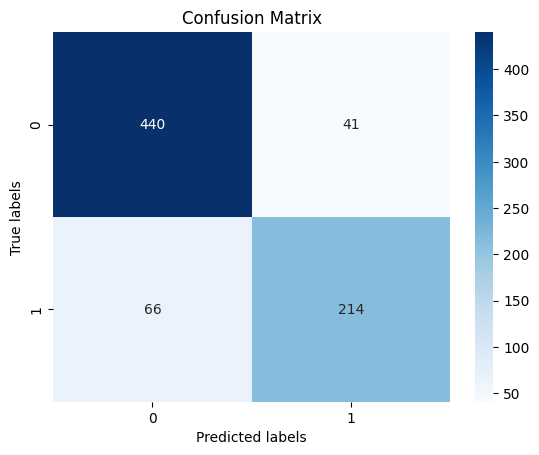

In [ ]:
evaluat_model(best_svm_model,X_test,y_test)
confusion_matrix_model(best_svm_model,X_test,y_test)

## Train the deafault Random Forrest (RF) model

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()
# Train the classifier on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Classification report : 
              precision    recall  f1-score   support

           0     0.8172    0.9106    0.8614       481
           1     0.8089    0.6500    0.7208       280

    accuracy                         0.8147       761
   macro avg     0.8130    0.7803    0.7911       761
weighted avg     0.8141    0.8147    0.8096       761



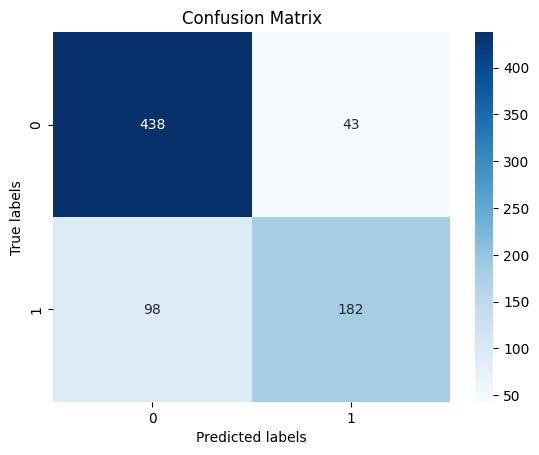

In [ ]:
evaluat_model(rf_model,X_test,y_test)
confusion_matrix_model(rf_model,X_test,y_test)

## Grid Search for Hyperparameter Tuning in Random Forrest (RF)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

best_rf_model = grid_search_hyperparameters(rf,param_grid)

Best paramaters :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Classification report : 
              precision    recall  f1-score   support

           0     0.8172    0.9106    0.8614       481
           1     0.8089    0.6500    0.7208       280

    accuracy                         0.8147       761
   macro avg     0.8130    0.7803    0.7911       761
weighted avg     0.8141    0.8147    0.8096       761



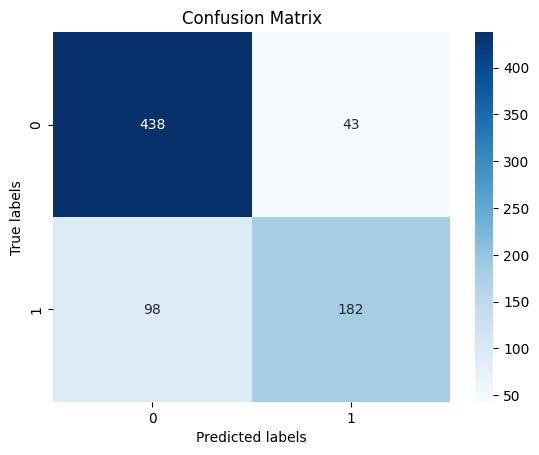

In [ ]:
evaluat_model(rf_model,X_test,y_test)
confusion_matrix_model(rf_model,X_test,y_test)

## Feature Importance Analysis using Random Forrest (RF)

In [ ]:
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   columns=['Importance'],
                                   index = cardioData.columns[:-1])

# Sort the DataFrame based on the "Importance" column in descending order
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(sorted_feature_importances)

                          Importance
Glucose                     0.255595
BMI                         0.153252
Age                         0.122949
DiabetesPedigreeFunction    0.119388
Pregnancies                 0.079649
BloodPressure               0.070406
PBS                         0.068576
Insulin                     0.066037
SkinThickness               0.064148


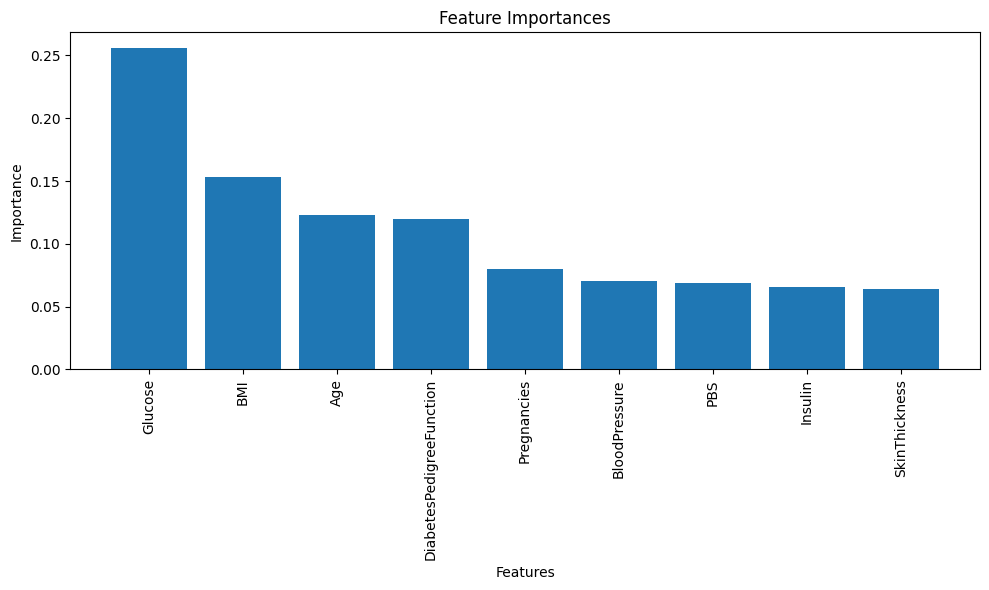

In [ ]:
# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(sorted_feature_importances.index, sorted_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Bonus XGBOOST

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=500)

# Train the classifier on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Classification report : 
              precision    recall  f1-score   support

           0     0.8103    0.8794    0.8435       481
           1     0.7573    0.6464    0.6975       280

    accuracy                         0.7937       761
   macro avg     0.7838    0.7629    0.7705       761
weighted avg     0.7908    0.7937    0.7898       761



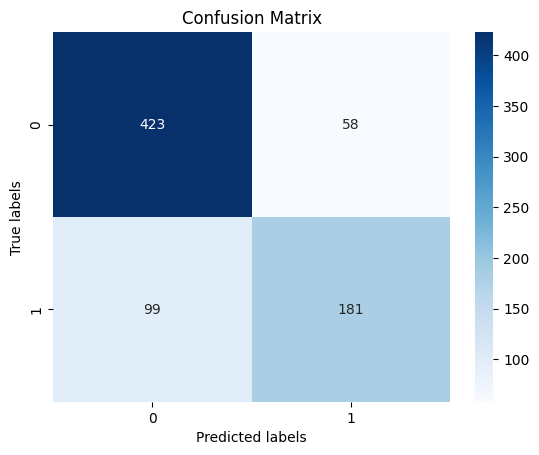

In [ ]:
evaluat_model(xgb_model,X_test,y_test)
confusion_matrix_model(xgb_model,X_test,y_test)